# DB 에서 정보 불러오기 (rental_daily_summary)

In [35]:
import mysql.connector

remote = mysql.connector.connect (
    host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "jinhyuk2dacibul",
    database = "project1"
)

cursor = remote.cursor(buffered=True)

cursor.execute("SELECT * \
                FROM rental_daily_summary r, weather_daily w \
                WHERE rental_date = weather_date")

result = cursor.fetchall()

for row in result:
    print(row)

(datetime.date(2024, 1, 1), 48927, datetime.date(2024, 1, 1), 3.3, 7.3, -0.3, 7.6, 0.0, 83.4, 65.0, 4.3, 44.8, 7.44, 1.7, 3.2)
(datetime.date(2024, 1, 2), 89691, datetime.date(2024, 1, 2), 2.9, 4.3, 2.2, 2.1, 0.0, 72.6, 59.0, 0.3, 3.1, 3.87, 1.6, 3.1)
(datetime.date(2024, 1, 3), 74474, datetime.date(2024, 1, 3), 1.8, 4.0, -1.1, 5.1, 0.6, 80.4, 72.0, 1.2, 12.4, 3.32, 1.6, 4.2)
(datetime.date(2024, 1, 4), 93416, datetime.date(2024, 1, 4), 1.4, 4.7, -3.3, 8.0, 0.0, 74.3, 64.0, 0.5, 5.2, 5.22, 1.9, 3.4)
(datetime.date(2024, 1, 5), 97979, datetime.date(2024, 1, 5), 5.0, 9.1, 1.4, 7.7, 0.0, 77.1, 59.0, 5.7, 58.8, 7.77, 2.3, 4.8)
(datetime.date(2024, 1, 6), 59055, datetime.date(2024, 1, 6), 0.7, 5.2, -2.7, 7.9, 2.4, 63.9, 34.0, 8.7, 89.7, 11.42, 2.2, 4.0)
(datetime.date(2024, 1, 7), 32920, datetime.date(2024, 1, 7), -4.4, -0.9, -8.3, 7.4, 0.0, 57.4, 34.0, 9.1, 93.8, 12.13, 3.1, 6.9)
(datetime.date(2024, 1, 8), 67260, datetime.date(2024, 1, 8), -4.7, 0.0, -10.3, 10.3, 0.0, 57.8, 29.0, 8.3, 85.

# df 로 저장

In [36]:
import pandas as pd

df_d = pd.DataFrame(result, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)'])
df_d.drop(['대여날', '날씨날'], axis=1, inplace=True)
df_d

대여수  평균기온(℃)  최고기온(℃)  최저기온(℃)   일교차  강수량(mm)  평균습도(%rh)  최저습도(%rh)  \
0    48927      3.3      7.3     -0.3   7.6      0.0       83.4       65.0   
1    89691      2.9      4.3      2.2   2.1      0.0       72.6       59.0   
2    74474      1.8      4.0     -1.1   5.1      0.6       80.4       72.0   
3    93416      1.4      4.7     -3.3   8.0      0.0       74.3       64.0   
4    97979      5.0      9.1      1.4   7.7      0.0       77.1       59.0   
..     ...      ...      ...      ...   ...      ...        ...        ...   
361  68332     -2.6      1.8     -5.9   7.7      0.0       51.4       35.0   
362  45729     -3.0      1.1     -6.7   7.8      0.0       48.3       37.0   
363  43612      1.1      6.1     -4.2  10.3      0.0       56.1       35.0   
364  79479      5.5     10.1      1.9   8.2      0.0       68.5       52.0   
365  72942      0.6      4.9     -2.0   6.9      0.0       45.8       28.0   

     일조합(hr)  일조율(%)  일사합(MJ/m2)  평균풍속(m/s)  최대풍속(m/s)  
0        4.3    44.8        7.44        1.7        3.2  
1        0.3     3.1        3.87        1.6        3.1  
2        1.2    12.4        3.32        1.6        4.2  
3        0.5     5.2        5.22        1.9        3.4  
4        5.7    58.8        7.77        2.3        4.8  
..       ...     ...         ...        ...        ...  
361      7.3    76.0        9.29        2.7        5.8  
362      8.3    86.5       11.01        2.5        5.8  
363      6.5    67.7        9.49        1.5        2.8  
364      2.6    27.1        6.29        2.3        6.9  
365      9.0    93.8       11.57        2.6        5.0  

[366 rows x 13 columns]

# 상관관계 찾기

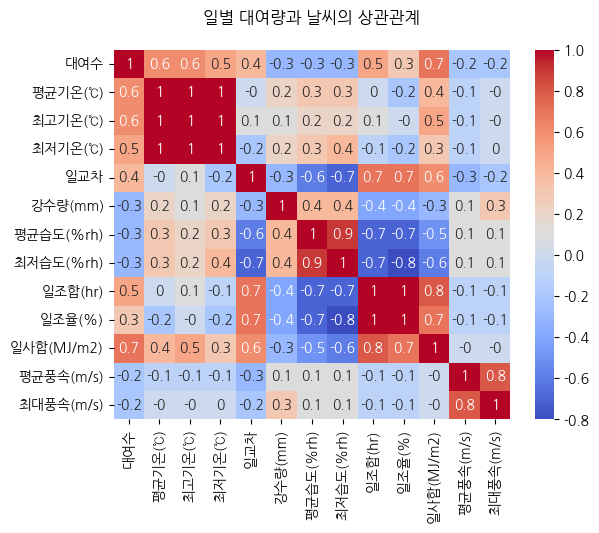

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

correlation_matrix = df_d.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title("일별 대여량과 날씨의 상관관계\n")
plt.show()

# 머신러닝 학습용 데이터 특성 선택

In [38]:
from sklearn.model_selection import train_test_split

x = df_d[['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
        '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)']]
y = df_d['대여수']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

# Decision Tree 생성

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=8, random_state=13)
# 최대 깊이 (트리가 몇번 나뉘는지)는 4번까지, 13번 번호 무작위
dt.fit(x_train, y_train)
# fit 으로 모델을 훈련/패턴 학습

pred = dt.predict(x_test) # 테스트용 x 데이터를 건네줘 보고나서

print(accuracy_score(y_test, pred)) # 테스트용 y 데이터와 얼만큼 맞는지 확인.


0.0


맞을확률... 0프로..

# Scatter plot 제작

### 일별 기온 VS 대여량

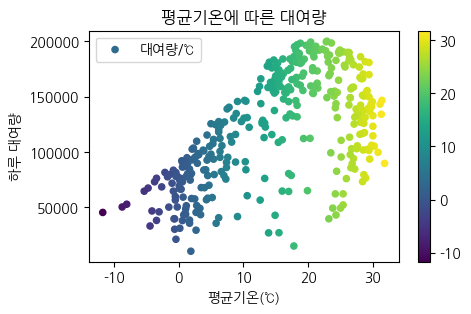

In [40]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

x = df_d['평균기온(℃)']
y = df_d['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y ,s=20, c=x, marker='o', label='대여량/℃')
plt.colorbar()
plt.legend()
plt.xlabel("평균기온(℃)")
plt.ylabel("하루 대여량")
plt.title("평균기온에 따른 대여량")
plt.show()


### 일별 강수량 VS 대여량

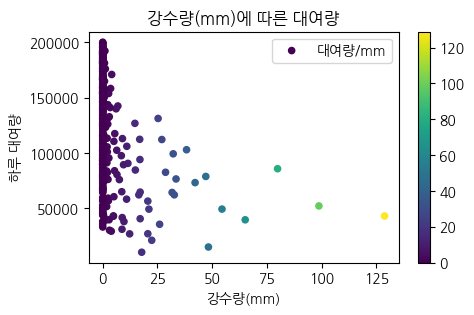

In [41]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

x = df_d['강수량(mm)']
y = df_d['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y, s=20, c=x, marker='o', label='대여량/mm')
plt.colorbar()
plt.legend()
plt.xlabel("강수량(mm)")
plt.ylabel("하루 대여량")
plt.title("강수량(mm)에 따른 대여량")
plt.show()

### 일별 평균습도 VS 대여량

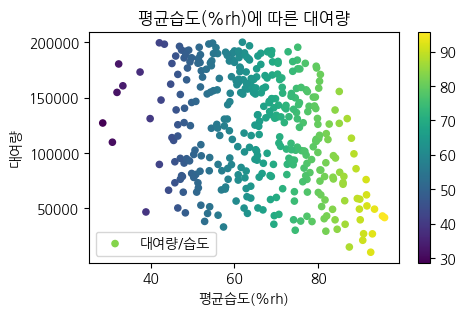

In [42]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

x = df_d['평균습도(%rh)']
y = df_d['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y, s=20, c=x, marker='o', label='대여량/습도')
plt.colorbar()
plt.legend()
plt.xlabel("평균습도(%rh)")
plt.ylabel("대여량")
plt.title("평균습도(%rh)에 따른 대여량")
plt.show()

### 일별 평균풍속 VS 대여량

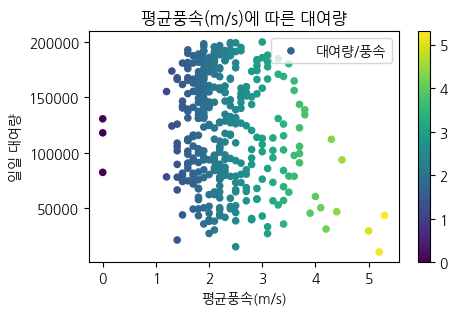

In [43]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

x = df_d['평균풍속(m/s)']
y = df_d['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y, s=20, c=x, marker='o', label='대여량/풍속')
plt.colorbar()
plt.legend()
plt.xlabel("평균풍속(m/s)")
plt.ylabel("일일 대여량")
plt.title("평균풍속(m/s)에 따른 대여량")
plt.show()

### 일별 일조율(%) VS 대여량

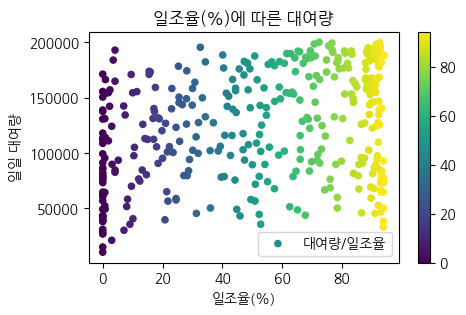

In [44]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

x = df_d['일조율(%)']
y = df_d['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y, s=20, c=x, marker='o', label='대여량/일조율')
plt.colorbar()
plt.legend()
plt.xlabel("일조율(%)")
plt.ylabel("일일 대여량")
plt.title("일조율(%)에 따른 대여량")
plt.show()

### 일별 일사합 VS 대여량

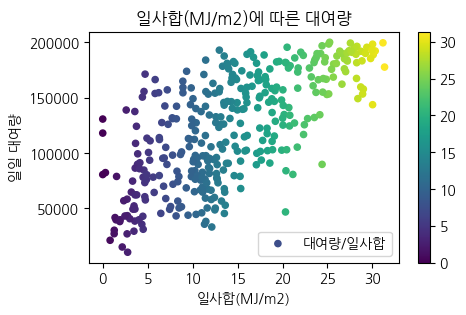

In [45]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

x = df_d['일사합(MJ/m2)']
y = df_d['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y, s=20, c=x, marker='o', label='대여량/일사합')
plt.colorbar()
plt.legend()
plt.xlabel("일사합(MJ/m2)")
plt.ylabel("일일 대여량")
plt.title("일사합(MJ/m2)에 따른 대여량")
plt.show()

### 일별 일사합 VS 대여량

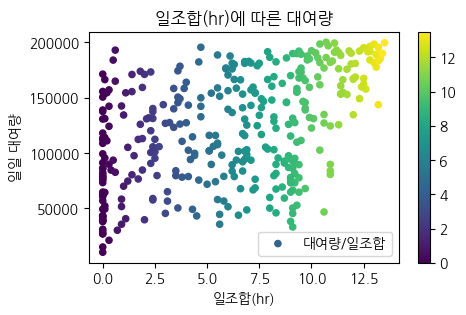

In [46]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

x = df_d['일조합(hr)']
y = df_d['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y, s=20, c=x, marker='o', label='대여량/일조합')
plt.colorbar()
plt.legend()
plt.xlabel("일조합(hr)")
plt.ylabel("일일 대여량")
plt.title("일조합(hr)에 따른 대여량")
plt.show()

# ================= 일별 분석 (5년치)==================

In [47]:
import mysql.connector
import pandas as pd

remote = mysql.connector.connect (
    host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "jinhyuk2dacibul",
    database = "project1"
)

cursor = remote.cursor(buffered=True)

cursor.execute("SELECT * FROM rental_daily_summary_B r, weather_daily w \
                WHERE rental_date = weather_date AND rental_date like '2024%'")
result_2024 = cursor.fetchall()

cursor.execute("SELECT * FROM rental_daily_summary_B r, weather_daily w \
                WHERE rental_date = weather_date AND rental_date like '2023%'")
result_2023 = cursor.fetchall()

cursor.execute("SELECT * FROM rental_daily_summary_B r, weather_daily w \
                WHERE rental_date = weather_date AND rental_date like '2022%'")
result_2022 = cursor.fetchall()

cursor.execute("SELECT * FROM rental_daily_summary_B r, weather_daily w \
                WHERE rental_date = weather_date AND rental_date like '2021%'")
result_2021 = cursor.fetchall()

cursor.execute("SELECT * FROM rental_daily_summary_B r, weather_daily w \
                WHERE rental_date = weather_date AND rental_date like '2020%'")
result_2020 = cursor.fetchall()

cursor.execute("SELECT * FROM rental_daily_summary_B r, weather_daily w \
                WHERE rental_date = weather_date AND rental_date like '2019%'")
result_2019 = cursor.fetchall()

df_d_2024 = pd.DataFrame(result_2024, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)'])
df_d_2024.drop(['대여날', '날씨날'], axis=1, inplace=True)

df_d_2023 = pd.DataFrame(result_2023, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)'])
df_d_2023.drop(['대여날', '날씨날'], axis=1, inplace=True)

df_d_2022 = pd.DataFrame(result_2022, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)'])
df_d_2022.drop(['대여날', '날씨날'], axis=1, inplace=True)

df_d_2021 = pd.DataFrame(result_2021, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)'])
df_d_2021.drop(['대여날', '날씨날'], axis=1, inplace=True)

df_d_2020 = pd.DataFrame(result_2020, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)'])
df_d_2020.drop(['대여날', '날씨날'], axis=1, inplace=True)

df_d_2019 = pd.DataFrame(result_2019, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)'])
df_d_2019.drop(['대여날', '날씨날'], axis=1, inplace=True)


In [48]:
df_d_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대여수         365 non-null    int64  
 1   평균기온(℃)     365 non-null    float64
 2   최고기온(℃)     365 non-null    float64
 3   최저기온(℃)     365 non-null    float64
 4   일교차         365 non-null    float64
 5   강수량(mm)     365 non-null    float64
 6   평균습도(%rh)   365 non-null    float64
 7   최저습도(%rh)   365 non-null    float64
 8   일조합(hr)     365 non-null    float64
 9   일조율(%)      365 non-null    float64
 10  일사합(MJ/m2)  365 non-null    float64
 11  평균풍속(m/s)   365 non-null    float64
 12  최대풍속(m/s)   365 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 37.2 KB


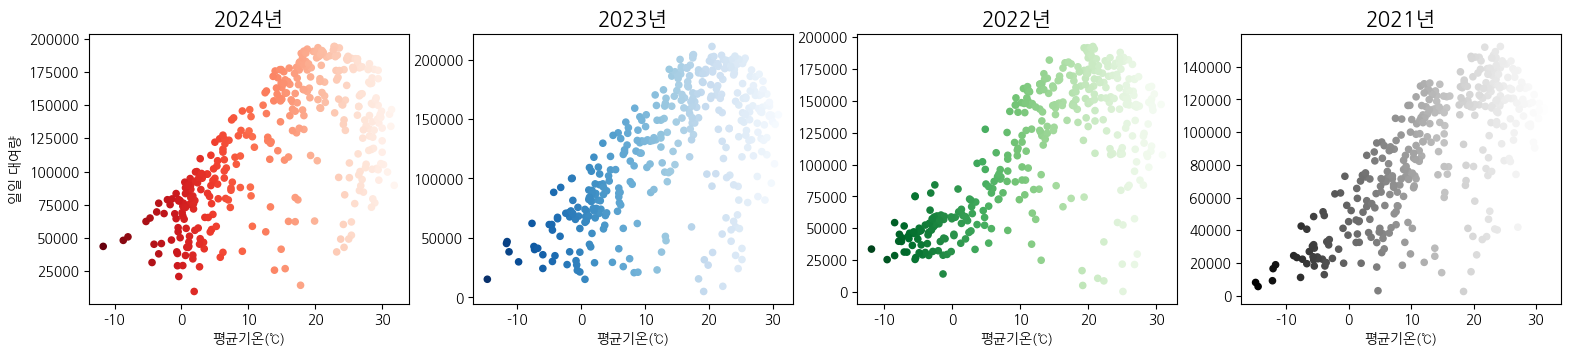

In [49]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

f, ax = plt.subplots(1, 4, figsize=(19,3.5))

ax[0].scatter(df_d_2024['평균기온(℃)'], df_d_2024['대여수'] ,s=20, c=-df_d_2024['평균기온(℃)'], cmap="Reds", marker='o', label='하루')
ax[0].set_xlabel("평균기온(℃)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("2024년", fontsize=15)


ax[1].scatter(df_d_2023['평균기온(℃)'], df_d_2023['대여수'] ,s=20, c=-df_d_2023['평균기온(℃)'], cmap="Blues", marker='o', label='하루')
ax[1].set_xlabel("평균기온(℃)")
ax[1].set_title("2023년", fontsize=15)

ax[2].scatter(df_d_2022['평균기온(℃)'], df_d_2022['대여수'] ,s=20, c=-df_d_2022['평균기온(℃)'], cmap="Greens", marker='o', label='하루')
ax[2].set_xlabel("평균기온(℃)")
ax[2].set_title("2022년", fontsize=15)

ax[3].scatter(df_d_2021['평균기온(℃)'], df_d_2021['대여수'] ,s=20, c=-df_d_2021['평균기온(℃)'], cmap="Greys", marker='o', label='하루')
ax[3].set_xlabel("평균기온(℃)")
ax[3].set_title("2021년", fontsize=15)
plt.show()

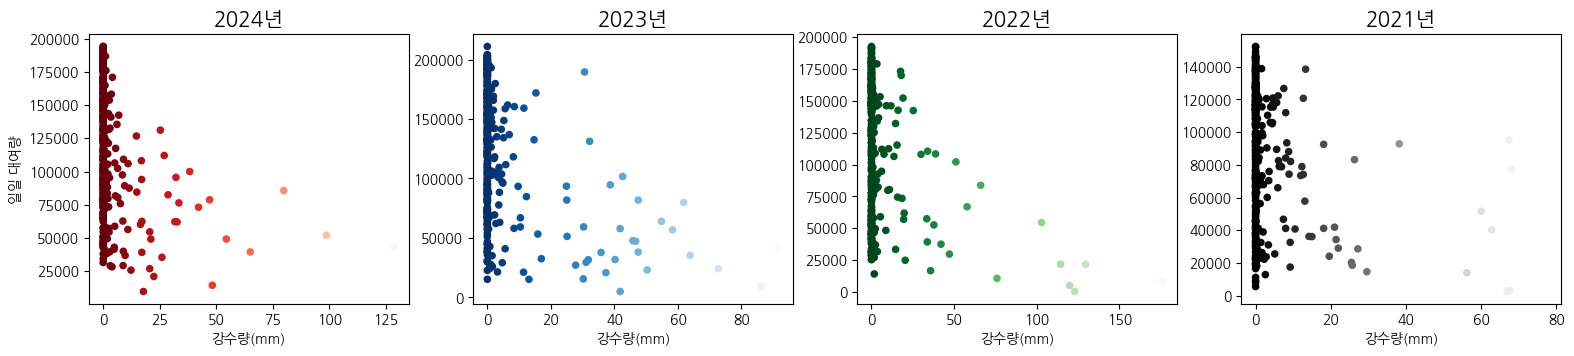

In [50]:
f, ax = plt.subplots(1, 4, figsize=(19,3.5))

ax[0].scatter(df_d_2024['강수량(mm)'], df_d_2024['대여수'] ,s=20, c=-df_d_2024['강수량(mm)'], cmap="Reds", marker='o', label='하루')
ax[0].set_xlabel("강수량(mm)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("2024년", fontsize=15)


ax[1].scatter(df_d_2023['강수량(mm)'], df_d_2023['대여수'] ,s=20, c=-df_d_2023['강수량(mm)'], cmap="Blues", marker='o', label='하루')
ax[1].set_xlabel("강수량(mm)")
ax[1].set_title("2023년", fontsize=15)

ax[2].scatter(df_d_2022['강수량(mm)'], df_d_2022['대여수'] ,s=20, c=-df_d_2022['강수량(mm)'], cmap="Greens", marker='o', label='하루')
ax[2].set_xlabel("강수량(mm)")
ax[2].set_title("2022년", fontsize=15)

ax[3].scatter(df_d_2021['강수량(mm)'], df_d_2021['대여수'] ,s=20, c=-df_d_2021['강수량(mm)'], cmap="Greys", marker='o', label='하루')
ax[3].set_xlabel("강수량(mm)")
ax[3].set_title("2021년", fontsize=15)
plt.show()

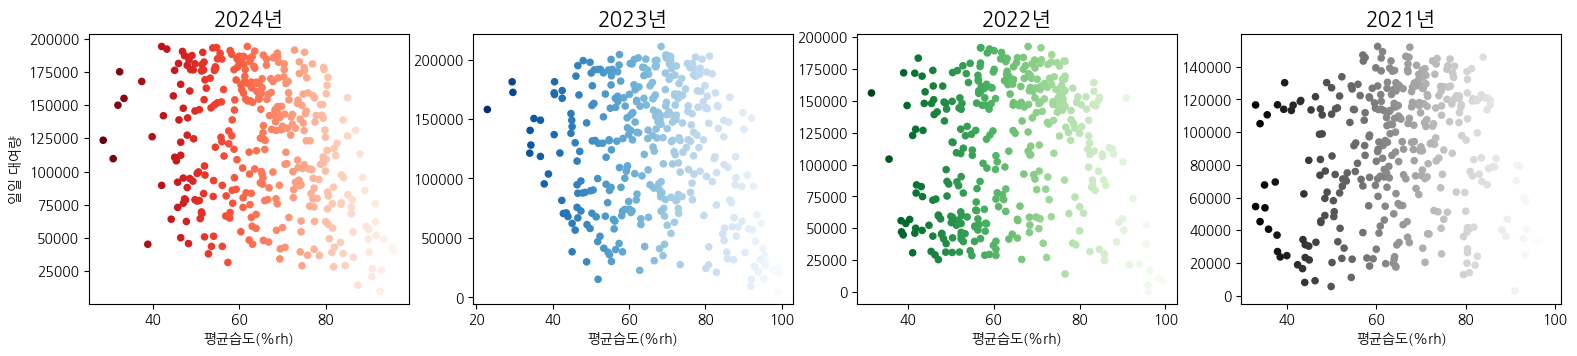

In [51]:
f, ax = plt.subplots(1, 4, figsize=(19,3.5))

ax[0].scatter(df_d_2024['평균습도(%rh)'], df_d_2024['대여수'] ,s=20, c=-df_d_2024['평균습도(%rh)'], cmap="Reds", marker='o', label='하루')
ax[0].set_xlabel("평균습도(%rh)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("2024년", fontsize=15)


ax[1].scatter(df_d_2023['평균습도(%rh)'], df_d_2023['대여수'] ,s=20, c=-df_d_2023['평균습도(%rh)'], cmap="Blues", marker='o', label='하루')
ax[1].set_xlabel("평균습도(%rh)")
ax[1].set_title("2023년", fontsize=15)

ax[2].scatter(df_d_2022['평균습도(%rh)'], df_d_2022['대여수'] ,s=20, c=-df_d_2022['평균습도(%rh)'], cmap="Greens", marker='o', label='하루')
ax[2].set_xlabel("평균습도(%rh)")
ax[2].set_title("2022년", fontsize=15)

ax[3].scatter(df_d_2021['평균습도(%rh)'], df_d_2021['대여수'] ,s=20, c=-df_d_2021['평균습도(%rh)'], cmap="Greys", marker='o', label='하루')
ax[3].set_xlabel("평균습도(%rh)")
ax[3].set_title("2021년", fontsize=15)
plt.show()

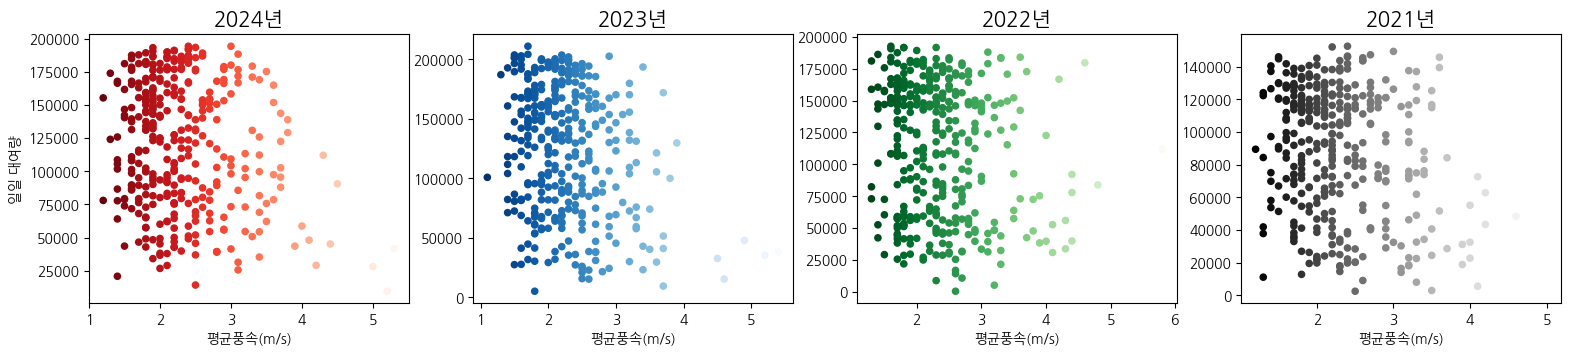

In [52]:
f, ax = plt.subplots(1, 4, figsize=(19,3.5))

df_d_2024 = df_d_2024[df_d_2024['평균풍속(m/s)']!= 0]
ax[0].scatter(df_d_2024['평균풍속(m/s)'], df_d_2024['대여수'] ,s=20, c=-df_d_2024['평균풍속(m/s)'], cmap="Reds", marker='o', label='하루')
ax[0].set_xlabel("평균풍속(m/s)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("2024년", fontsize=15)

df_d_2023 = df_d_2023[df_d_2023['평균풍속(m/s)']!= 0]
ax[1].scatter(df_d_2023['평균풍속(m/s)'], df_d_2023['대여수'] ,s=20, c=-df_d_2023['평균풍속(m/s)'], cmap="Blues", marker='o', label='하루')
ax[1].set_xlabel("평균풍속(m/s)")
ax[1].set_title("2023년", fontsize=15)

ax[2].scatter(df_d_2022['평균풍속(m/s)'], df_d_2022['대여수'] ,s=20, c=-df_d_2022['평균풍속(m/s)'], cmap="Greens", marker='o', label='하루')
ax[2].set_xlabel("평균풍속(m/s)")
ax[2].set_title("2022년", fontsize=15)

ax[3].scatter(df_d_2021['평균풍속(m/s)'], df_d_2021['대여수'] ,s=20, c=-df_d_2021['평균풍속(m/s)'], cmap="Greys", marker='o', label='하루')
ax[3].set_xlabel("평균풍속(m/s)")
ax[3].set_title("2021년", fontsize=15)
plt.show()

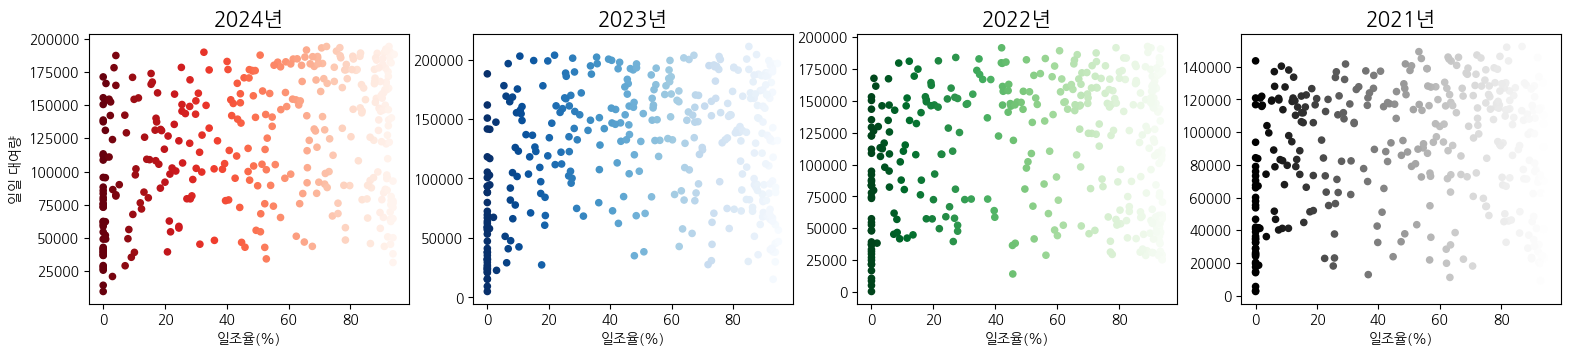

In [53]:
f, ax = plt.subplots(1, 4, figsize=(19,3.5))

ax[0].scatter(df_d_2024['일조율(%)'], df_d_2024['대여수'] ,s=20, c=-df_d_2024['일조율(%)'], cmap="Reds", marker='o', label='하루')
ax[0].set_xlabel("일조율(%)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("2024년", fontsize=15)

ax[1].scatter(df_d_2023['일조율(%)'], df_d_2023['대여수'] ,s=20, c=-df_d_2023['일조율(%)'], cmap="Blues", marker='o', label='하루')
ax[1].set_xlabel("일조율(%)")
ax[1].set_title("2023년", fontsize=15)

ax[2].scatter(df_d_2022['일조율(%)'], df_d_2022['대여수'] ,s=20, c=-df_d_2022['일조율(%)'], cmap="Greens", marker='o', label='하루')
ax[2].set_xlabel("일조율(%)")
ax[2].set_title("2022년", fontsize=15)

ax[3].scatter(df_d_2021['일조율(%)'], df_d_2021['대여수'] ,s=20, c=-df_d_2021['일조율(%)'], cmap="Greys", marker='o', label='하루')
ax[3].set_xlabel("일조율(%)")
ax[3].set_title("2021년", fontsize=15)
plt.show()

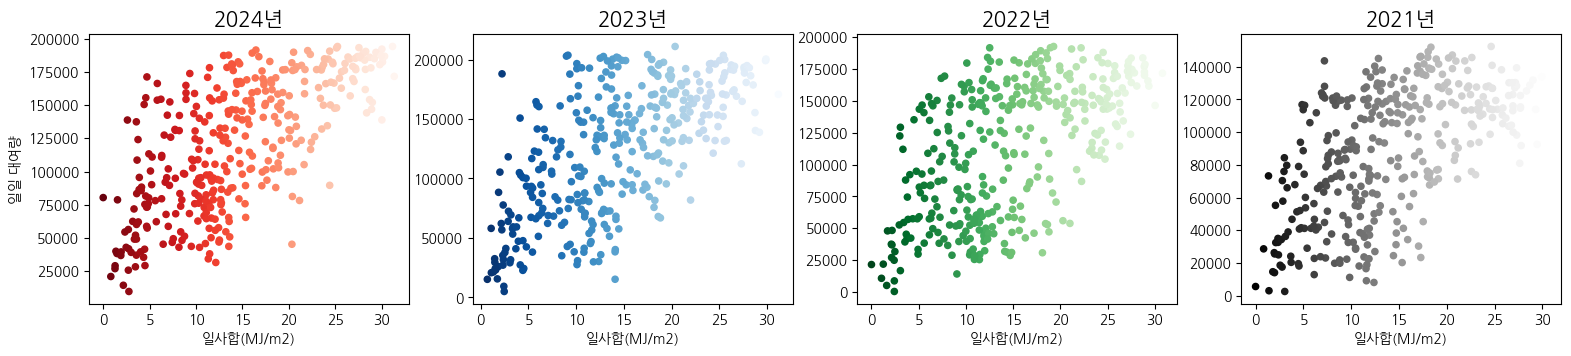

In [54]:
f, ax = plt.subplots(1, 4, figsize=(19,3.5))

ax[0].scatter(df_d_2024['일사합(MJ/m2)'], df_d_2024['대여수'] ,s=20, c=-df_d_2024['일사합(MJ/m2)'], cmap="Reds", marker='o', label='하루')
ax[0].set_xlabel("일사합(MJ/m2)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("2024년", fontsize=15)

ax[1].scatter(df_d_2023['일사합(MJ/m2)'], df_d_2023['대여수'] ,s=20, c=-df_d_2023['일사합(MJ/m2)'], cmap="Blues", marker='o', label='하루')
ax[1].set_xlabel("일사합(MJ/m2)")
ax[1].set_title("2023년", fontsize=15)

ax[2].scatter(df_d_2022['일사합(MJ/m2)'], df_d_2022['대여수'] ,s=20, c=-df_d_2022['일사합(MJ/m2)'], cmap="Greens", marker='o', label='하루')
ax[2].set_xlabel("일사합(MJ/m2)")
ax[2].set_title("2022년", fontsize=15)

ax[3].scatter(df_d_2021['일사합(MJ/m2)'], df_d_2021['대여수'] ,s=20, c=-df_d_2021['일사합(MJ/m2)'], cmap="Greys", marker='o', label='하루')
ax[3].set_xlabel("일사합(MJ/m2)")
ax[3].set_title("2021년", fontsize=15)
plt.show()

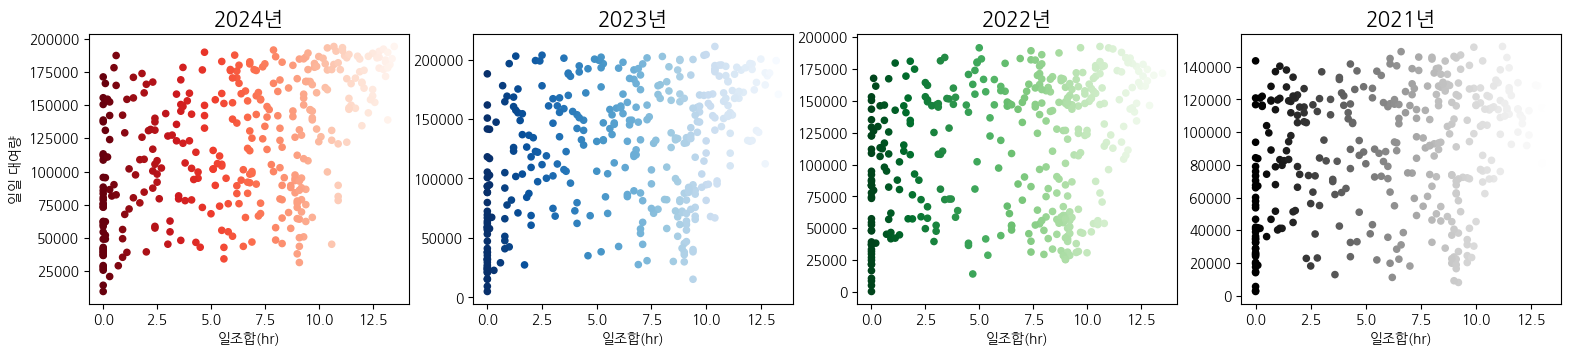

In [55]:
f, ax = plt.subplots(1, 4, figsize=(19,3.5))

ax[0].scatter(df_d_2024['일조합(hr)'], df_d_2024['대여수'] ,s=20, c=-df_d_2024['일조합(hr)'], cmap="Reds", marker='o', label='하루')
ax[0].set_xlabel("일조합(hr)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("2024년", fontsize=15)

ax[1].scatter(df_d_2023['일조합(hr)'], df_d_2023['대여수'] ,s=20, c=-df_d_2023['일조합(hr)'], cmap="Blues", marker='o', label='하루')
ax[1].set_xlabel("일조합(hr)")
ax[1].set_title("2023년", fontsize=15)

ax[2].scatter(df_d_2022['일조합(hr)'], df_d_2022['대여수'] ,s=20, c=-df_d_2022['일조합(hr)'], cmap="Greens", marker='o', label='하루')
ax[2].set_xlabel("일조합(hr)")
ax[2].set_title("2022년", fontsize=15)

ax[3].scatter(df_d_2021['일조합(hr)'], df_d_2021['대여수'] ,s=20, c=-df_d_2021['일조합(hr)'], cmap="Greys", marker='o', label='하루')
ax[3].set_xlabel("일조합(hr)")
ax[3].set_title("2021년", fontsize=15)
plt.show()

In [56]:
df_d_2024[df_d_2024['평균풍속(m/s)']!= 0]

대여수  평균기온(℃)  최고기온(℃)  최저기온(℃)   일교차  강수량(mm)  평균습도(%rh)  최저습도(%rh)  \
0    46628      3.3      7.3     -0.3   7.6      0.0       83.4       65.0   
1    86401      2.9      4.3      2.2   2.1      0.0       72.6       59.0   
2    71808      1.8      4.0     -1.1   5.1      0.6       80.4       72.0   
3    90108      1.4      4.7     -3.3   8.0      0.0       74.3       64.0   
4    94927      5.0      9.1      1.4   7.7      0.0       77.1       59.0   
..     ...      ...      ...      ...   ...      ...        ...        ...   
361  68333     -2.6      1.8     -5.9   7.7      0.0       51.4       35.0   
362  45732     -3.0      1.1     -6.7   7.8      0.0       48.3       37.0   
363  43614      1.1      6.1     -4.2  10.3      0.0       56.1       35.0   
364  79482      5.5     10.1      1.9   8.2      0.0       68.5       52.0   
365  72945      0.6      4.9     -2.0   6.9      0.0       45.8       28.0   

     일조합(hr)  일조율(%)  일사합(MJ/m2)  평균풍속(m/s)  최대풍속(m/s)  
0        4.3    44.8        7.44        1.7        3.2  
1        0.3     3.1        3.87        1.6        3.1  
2        1.2    12.4        3.32        1.6        4.2  
3        0.5     5.2        5.22        1.9        3.4  
4        5.7    58.8        7.77        2.3        4.8  
..       ...     ...         ...        ...        ...  
361      7.3    76.0        9.29        2.7        5.8  
362      8.3    86.5       11.01        2.5        5.8  
363      6.5    67.7        9.49        1.5        2.8  
364      2.6    27.1        6.29        2.3        6.9  
365      9.0    93.8       11.57        2.6        5.0  

[363 rows x 13 columns]

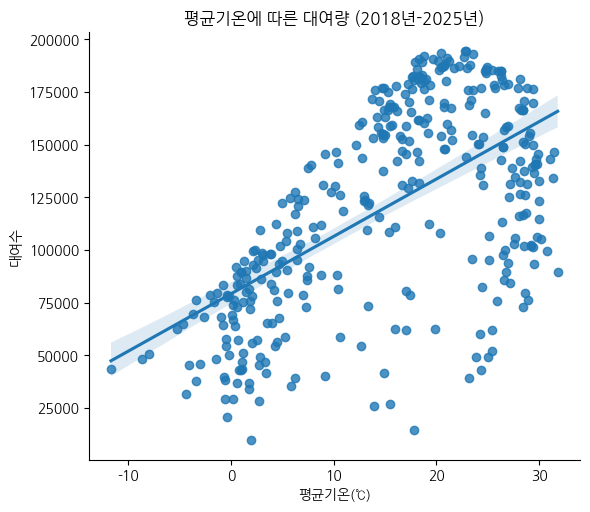

In [57]:
sns.lmplot(x='평균기온(℃)' , y='대여수', data=df_d_2024 , aspect=1.2)
plt.title('평균기온에 따른 대여량 (2018년-2025년)')
plt.xlabel('평균기온(℃)')
plt.show()

# ==================시간별 분석==================

In [58]:
import mysql.connector

remote = mysql.connector.connect (
    host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "jinhyuk2dacibul",
    database = "project1"
)

cursor = remote.cursor(buffered=True)

cursor.execute("SELECT * \
                FROM rental_hourly_summary r, weather_hourly w \
                WHERE rental_date = weather_date AND rental_hour = weather_hour")

result_h = cursor.fetchall()

for row in result_h:
    print(row)

(datetime.date(2024, 1, 1), 0, 1387, datetime.date(2024, 1, 1), 0, 0.6, 0.0, 97.0, 1.9, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 1, 1888, datetime.date(2024, 1, 1), 1, 0.5, 0.0, 97.0, 2.2, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 2, 1462, datetime.date(2024, 1, 1), 2, 0.4, 0.0, 98.0, 0.4, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 3, 1002, datetime.date(2024, 1, 1), 3, -0.1, 0.0, 98.0, 1.7, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 4, 747, datetime.date(2024, 1, 1), 4, -0.2, 0.0, 98.0, 2.2, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 5, 687, datetime.date(2024, 1, 1), 5, 0.3, 0.0, 99.0, 1.2, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 6, 952, datetime.date(2024, 1, 1), 6, 0.5, 0.0, 99.0, 2.0, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 7, 1101, datetime.date(2024, 1, 1), 7, 0.4, 0.0, 98.0, 2.1, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 8, 1227, datetime.date(2024, 1, 1), 8, 0.2, 0.0, 98.0, 0.8, 0.0, 0.0, 2.4)
(datetime.date(2024, 1, 1), 9, 1268, datetime.date(2024, 1, 1), 9, 0.6, 0.

# df_h 로 저장

In [59]:
import pandas as pd

df_h = pd.DataFrame(result_h, columns = ['대여날', '대여시', '대여수', '날씨날', '시간', 
                                     '기온(℃)', '강수량(mm)', '습도(%rh)', '풍속(m/s)', 
                                     '일조(hr)', '일사(MJ/m2)', '적설(cm)'])
df_h.drop(['대여날', '대여시', '날씨날'], axis=1, inplace=True)
df_h

대여수  시간  기온(℃)  강수량(mm)  습도(%rh)  풍속(m/s)  일조(hr)  일사(MJ/m2)  적설(cm)
0     1387   0    0.6      0.0     97.0      1.9     0.0       0.00     2.4
1     1888   1    0.5      0.0     97.0      2.2     0.0       0.00     2.4
2     1462   2    0.4      0.0     98.0      0.4     0.0       0.00     2.4
3     1002   3   -0.1      0.0     98.0      1.7     0.0       0.00     2.4
4      747   4   -0.2      0.0     98.0      2.2     0.0       0.00     2.4
...    ...  ..    ...      ...      ...      ...     ...        ...     ...
8779  4371   7   -1.0      0.0     49.0      3.0     0.0       0.00     0.0
8780  3074  11    1.1      0.0     38.0      3.4     1.0       1.48     0.0
8781  5796  17    2.5      0.0     37.0      3.4     1.0       0.42     0.0
8782  2420  21   -0.7      0.0     51.0      1.0     0.0       0.00     0.0
8783  2159  22   -1.0      0.0     53.0      0.7     0.0       0.00     0.0

[8784 rows x 9 columns]

# 상관관계 찾기

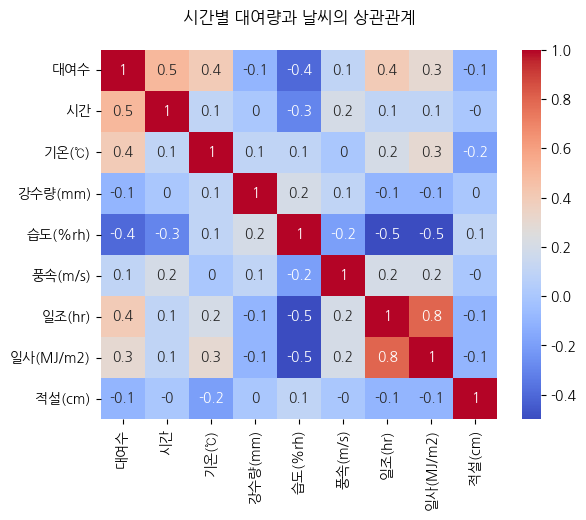

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

correlation_matrixH = df_h.corr().round(1)
sns.heatmap(data=correlation_matrixH, annot=True, cmap='coolwarm')
plt.title("시간별 대여량과 날씨의 상관관계\n")
plt.show()

# 머신러닝 학습용 데이터 특성 선택

In [61]:
from sklearn.model_selection import train_test_split

x_h = df_h[['시간', '기온(℃)', '강수량(mm)', '습도(%rh)', '풍속(m/s)', '일조(hr)', '일사(MJ/m2)', '적설(cm)']]
y_h = df_h['대여수']

x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x_h, y_h, test_size=0.2, random_state=13)

# Decision Tree 생성

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_h = DecisionTreeClassifier(max_depth=5, random_state=13)
# 최대 깊이 (트리가 몇번 나뉘는지)는 4번까지, 13번 번호 무작위
dt_h.fit(x_train_h, y_train_h)
# fit 으로 모델을 훈련/패턴 학습

pred_h = dt_h.predict(x_test_h) # 테스트용 x 데이터를 건네줘 보고나서

print(accuracy_score(y_test_h, pred_h)) # 테스트용 y 데이터와 얼만큼 맞는지 확인.

0.0011383039271485487


---
# Scatter plot 만들기

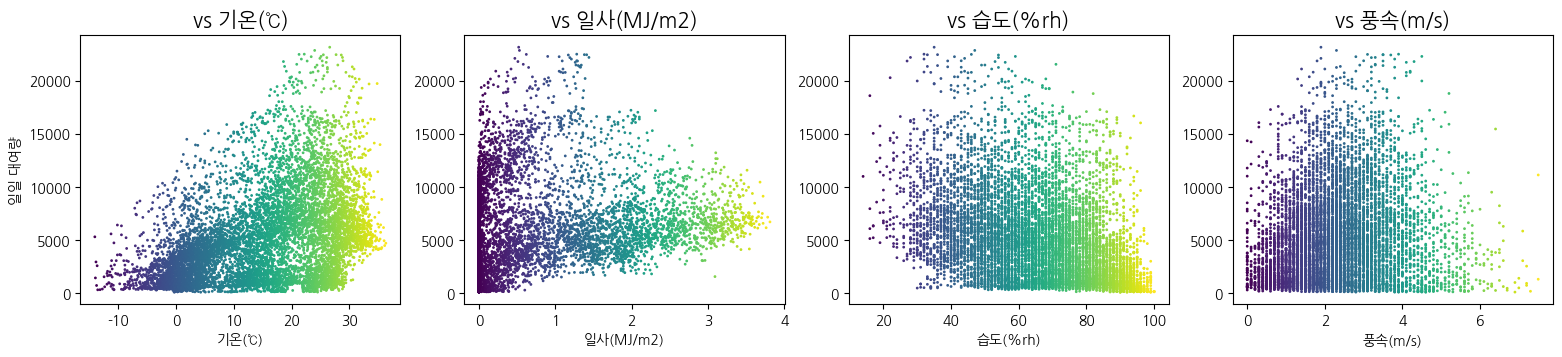

In [63]:
f, ax = plt.subplots(1, 4, figsize=(19,3.5))

ax[0].scatter(df_h['기온(℃)'], df_h['대여수'] ,s=1, c=df_h['기온(℃)'], marker='o', label='하루')
ax[0].set_xlabel("기온(℃)")
ax[0].set_ylabel("일일 대여량")
ax[0].set_title("vs 기온(℃)", fontsize=15)

ax[1].scatter(df_h['일사(MJ/m2)'], df_h['대여수'] ,s=1, c=df_h['일사(MJ/m2)'], marker='o', label='하루')
ax[1].set_xlabel("일사(MJ/m2)")
ax[1].set_title("vs 일사(MJ/m2)", fontsize=15)

ax[2].scatter(df_h['습도(%rh)'], df_h['대여수'] ,s=1, c=df_h['습도(%rh)'], marker='o', label='하루')
ax[2].set_xlabel("습도(%rh)")
ax[2].set_title("vs 습도(%rh)", fontsize=15)

ax[3].scatter(df_h['풍속(m/s)'], df_h['대여수'] ,s=1, c=df_h['풍속(m/s)'], marker='o', label='하루')
ax[3].set_xlabel("풍속(m/s)")
ax[3].set_title("vs 풍속(m/s)", fontsize=15)
plt.show()

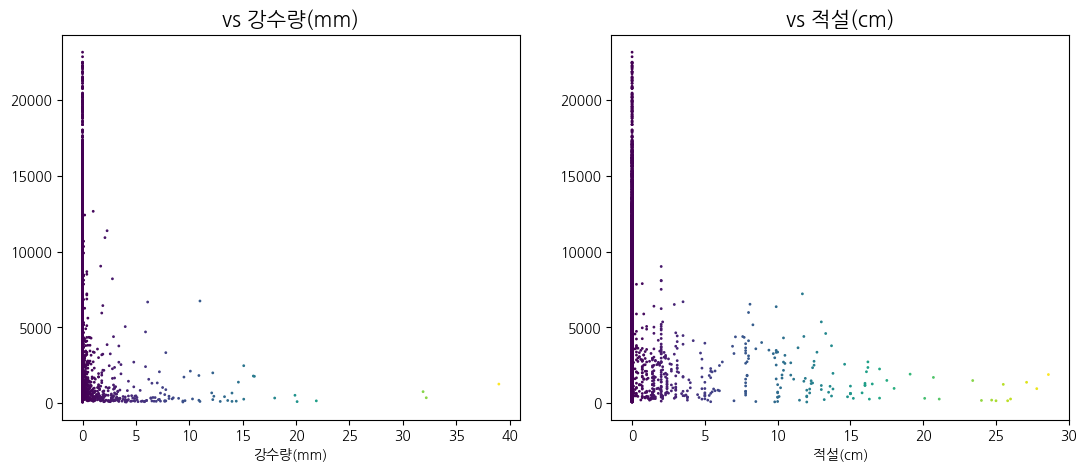

In [64]:
f, ax = plt.subplots(1, 2, figsize=(13,5))

ax[0].scatter(df_h['강수량(mm)'], df_h['대여수'] ,s=1, c=df_h['강수량(mm)'], marker='o', label='하루')
ax[0].set_xlabel("강수량(mm)")
ax[0].set_title("vs 강수량(mm)", fontsize=15)

ax[1].scatter(df_h['적설(cm)'], df_h['대여수'] ,s=1, c=df_h['적설(cm)'], marker='o', label='하루')
ax[1].set_xlabel("적설(cm)")
ax[1].set_title("vs 적설(cm)", fontsize=15)

plt.show()

# 강수량 / 적설량에 따른 평균 대여량

In [65]:
mm = df_h['강수량(mm)'].unique()
cm = df_h['적설(cm)'].unique()

avg_mm = []
avg_cm = []

for i in mm: 
    avg = round(float(df_h[df_h['강수량(mm)'] == i ]['대여수'].mean()),1)
    avg_mm.append(avg)

for i in cm:
    avg = round(float(df_h[df_h['적설(cm)'] == i ]['대여수'].mean()),1)
    avg_cm.append(avg)

In [66]:
df_h['강수량(mm)'].unique().max()

np.float64(39.0)

생각보다 별로임

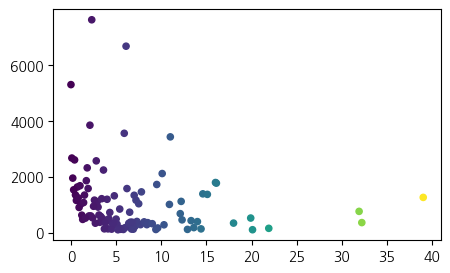

In [67]:
df_h_rain = pd.DataFrame({'강수량(mm)': mm, '대여수': avg_mm})
df_h_snow = pd.DataFrame({'적설(cm)': cm, '대여수': avg_cm})

x = df_h_rain['강수량(mm)']
y = df_h_rain['대여수']

plt.figure(figsize=(5,3))
plt.scatter(x, y ,s=20, c=x, marker='o', label='대여량/mm')

In [68]:
df_h['강수량분류'] = pd.cut(
                            df_h['강수량(mm)'], bins=[0.0, 1, 2, 3, 4, 5, 40],
                            include_lowest = True,
                            labels=['1mm 미만', '1~2mm', '2~3mm', '3~4mm', '4~5mm', '5mm 이상']
                            )

df_h['적설분류'] = pd.cut(
                        df_h['적설(cm)'], bins=[0, 2, 5, 10, 15, 30],
                        include_lowest = True,
                        labels=['2cm 미만', '2~5cm', '5~10cm', '10~15cm', '15cm 이상']
                        )

df_h

대여수  시간  기온(℃)  강수량(mm)  습도(%rh)  풍속(m/s)  일조(hr)  일사(MJ/m2)  적설(cm)  \
0     1387   0    0.6      0.0     97.0      1.9     0.0       0.00     2.4   
1     1888   1    0.5      0.0     97.0      2.2     0.0       0.00     2.4   
2     1462   2    0.4      0.0     98.0      0.4     0.0       0.00     2.4   
3     1002   3   -0.1      0.0     98.0      1.7     0.0       0.00     2.4   
4      747   4   -0.2      0.0     98.0      2.2     0.0       0.00     2.4   
...    ...  ..    ...      ...      ...      ...     ...        ...     ...   
8779  4371   7   -1.0      0.0     49.0      3.0     0.0       0.00     0.0   
8780  3074  11    1.1      0.0     38.0      3.4     1.0       1.48     0.0   
8781  5796  17    2.5      0.0     37.0      3.4     1.0       0.42     0.0   
8782  2420  21   -0.7      0.0     51.0      1.0     0.0       0.00     0.0   
8783  2159  22   -1.0      0.0     53.0      0.7     0.0       0.00     0.0   

       강수량분류    적설분류  
0     1mm 미만   2~5cm  
1     1mm 미만   2~5cm  
2     1mm 미만   2~5cm  
3     1mm 미만   2~5cm  
4     1mm 미만   2~5cm  
...      ...     ...  
8779  1mm 미만  2cm 미만  
8780  1mm 미만  2cm 미만  
8781  1mm 미만  2cm 미만  
8782  1mm 미만  2cm 미만  
8783  1mm 미만  2cm 미만  

[8784 rows x 11 columns]

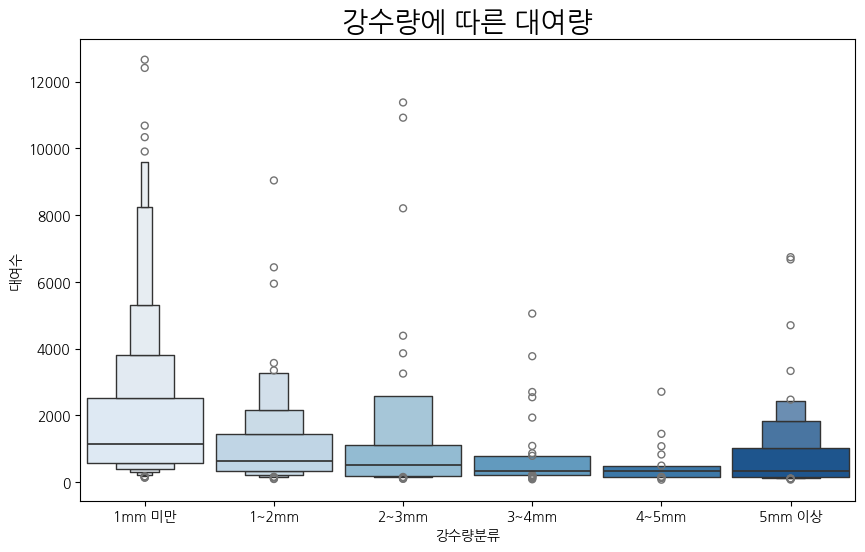

In [69]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df_h[df_h['강수량(mm)'] >= 0.1],
              x= '강수량분류',
              hue = '강수량분류',
              y= '대여수',
              palette="Blues",
              linewidth= 1,
              width=0.9,
              )
plt.title("강수량에 따른 대여량", fontsize=20)
plt.show()
              

도대체 5mm 이상 폭우가 쏟아지는 날 왜 자전거 대여량이 상승하는지는 모르겠으나, 아마도 빨리 귀가하고 싶은 마음이지 않았을까..

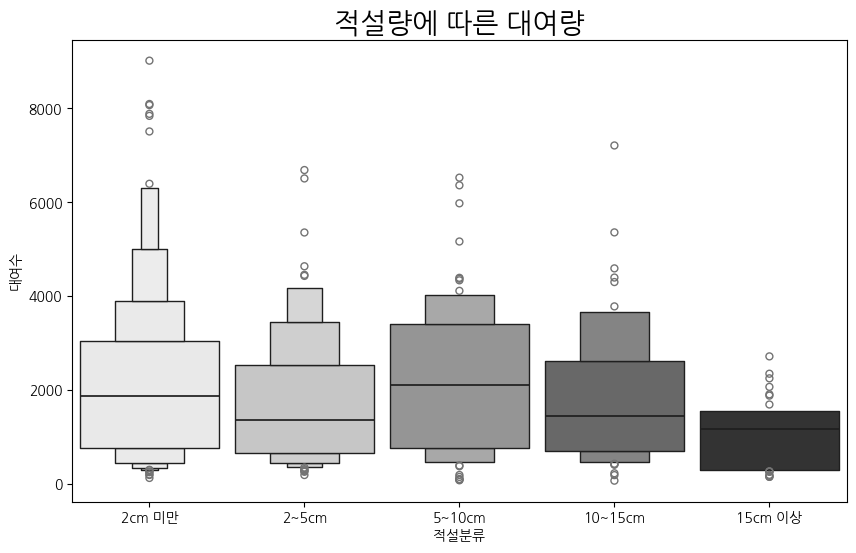

In [70]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df_h[df_h['적설(cm)'] >= 0.1],
              x= '적설분류',
              hue = '적설분류',
              y= '대여수',
              palette="Greys",
              linewidth= 1,
              width=0.9,
              )
plt.title("적설량에 따른 대여량", fontsize=20)
plt.show()
              

---
# 체감온도 분석

In [71]:
import mysql.connector

remote = mysql.connector.connect (
    host = "jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "jinhyuk2dacibul",
    database = "project1"
)

cursor = remote.cursor(buffered=True)

cursor.execute("SELECT * \
                FROM rental_daily_summary_B r, weather_daily_B w \
                WHERE rental_date = weather_date")

result = cursor.fetchall()

for row in result:
    print(row)

(datetime.date(2018, 1, 1), 4950, datetime.date(2018, 1, 1), -1.3, 3.8, -5.1, 8.9, 0.0, 39.1, 19.0, 8.3, 86.5, 6.14, 1.4, 3.8, 0.0)
(datetime.date(2018, 1, 2), 7136, datetime.date(2018, 1, 2), -1.8, 1.8, -4.3, 6.1, 0.0, 42.0, 19.0, 7.9, 82.3, 5.36, 1.8, 4.9, 0.0)
(datetime.date(2018, 1, 3), 7156, datetime.date(2018, 1, 3), -4.7, -0.4, -7.1, 6.7, 0.0, 42.3, 28.0, 8.6, 88.7, 6.56, 2.2, 3.5, 0.0)
(datetime.date(2018, 1, 4), 7102, datetime.date(2018, 1, 4), -4.7, -0.7, -8.7, 8.0, 0.0, 43.0, 31.0, 6.2, 63.9, 4.73, 1.4, 3.5, 0.0)
(datetime.date(2018, 1, 5), 7705, datetime.date(2018, 1, 5), -3.0, 1.6, -5.6, 7.2, 0.0, 48.4, 32.0, 8.2, 84.5, 5.96, 1.7, 3.6, 0.0)
(datetime.date(2018, 1, 6), 5681, datetime.date(2018, 1, 6), -2.8, 2.9, -6.8, 9.7, 0.0, 45.8, 26.0, 8.8, 90.7, 6.79, 1.5, 3.1, 0.0)
(datetime.date(2018, 1, 7), 5220, datetime.date(2018, 1, 7), -0.8, 2.8, -5.7, 8.5, 0.0, 42.1, 30.0, 3.1, 32.0, 3.75, 0.8, 2.5, 0.0)
(datetime.date(2018, 1, 8), 6309, datetime.date(2018, 1, 8), 1.3, 4.0, -1.

In [72]:
import pandas as pd

df_d_sense = pd.DataFrame(result, columns = ['대여날', '대여수', '날씨날', 
                                     '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차', '강수량(mm)', '평균습도(%rh)', '최저습도(%rh)', 
                                     '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '평균풍속(m/s)', '최대풍속(m/s)','체감온도(°C)'])
df_d_sense.drop(['대여날', '날씨날'], axis=1, inplace=True)
df_d_sense[df_d_sense['체감온도(°C)'] != 0.0]

대여수  평균기온(℃)  최고기온(℃)  최저기온(℃)   일교차  강수량(mm)  평균습도(%rh)  최저습도(%rh)  \
794    93156     13.3     18.4      8.5   9.9      0.0       57.3       40.0   
795   100369     14.2     19.7      9.3  10.4      0.0       55.9       34.0   
796   103348     16.0     22.0      9.9  12.1      0.0       48.9       24.0   
802    97160     13.6     18.4      8.6   9.8      0.0       52.3       30.0   
803    92998     12.8     18.0      8.5   9.5      0.0       47.0       20.0   
...      ...      ...      ...      ...   ...      ...        ...        ...   
2338   68333     -2.6      1.8     -5.9   7.7      0.0       51.4       35.0   
2339   45732     -3.0      1.1     -6.7   7.8      0.0       48.3       37.0   
2340   43614      1.1      6.1     -4.2  10.3      0.0       56.1       35.0   
2341   79482      5.5     10.1      1.9   8.2      0.0       68.5       52.0   
2342   72945      0.6      4.9     -2.0   6.9      0.0       45.8       28.0   

      일조합(hr)  일조율(%)  일사합(MJ/m2)  평균풍속(m/s)  최대풍속(m/s)  체감온도(°C)  
794      10.5    90.5       19.44        2.5        5.1       7.6  
795      10.8    93.1       19.81        2.0        4.1       8.5  
796       8.9    76.7       16.99        1.9        3.4       8.3  
802       7.1    62.8       14.16        2.2        4.7       6.9  
803       5.8    51.3       12.19        2.4        5.8       6.4  
...       ...     ...         ...        ...        ...       ...  
2338      7.3    76.0        9.29        2.7        5.8     -10.0  
2339      8.3    86.5       11.01        2.5        5.8     -11.5  
2340      6.5    67.7        9.49        1.5        2.8      -7.5  
2341      2.6    27.1        6.29        2.3        6.9      -0.4  
2342      9.0    93.8       11.57        2.6        5.0      -5.2  

[744 rows x 14 columns]

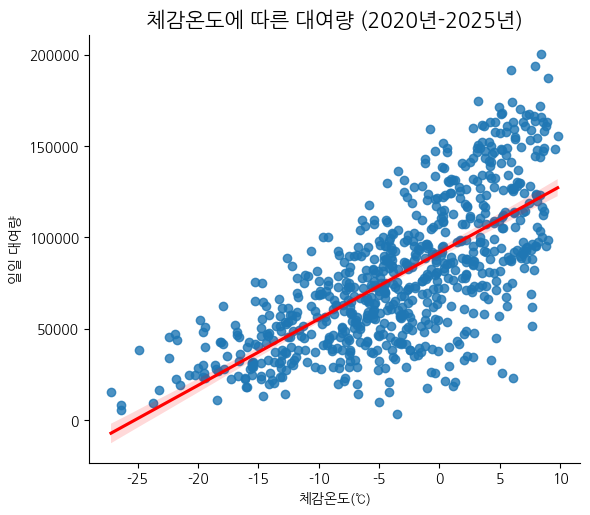

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

tmp = df_d_sense[df_d_sense['체감온도(°C)'] != 0.0]

sns.lmplot(x='체감온도(°C)' , y='대여수', data = tmp, aspect=1.2, markers= 'o', line_kws={'color': 'red'})
plt.title('체감온도에 따른 대여량 (2020년-2025년)', fontsize=15)
plt.xlabel('체감온도(℃)')
plt.ylabel('일일 대여량')
plt.show()